In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [5]:
def plot_multiple(images, titles, colormap='gray', max_columns=np.inf, share_axes=True, size_scale = 4):
    """Plot multiple images as subplots on a grid."""
    assert len(images) == len(titles)
    n_images = len(images)
    n_cols = min(max_columns, n_images)
    n_rows = int(np.ceil(n_images / n_cols))
    fig, axes = plt.subplots(
        n_rows, n_cols, figsize=(n_cols * size_scale, n_rows * size_scale),
        squeeze=False, sharex=share_axes, sharey=share_axes)

    axes = axes.flat
    # Hide subplots without content
    for ax in axes[n_images:]:
        ax.axis('off')
        
    if not isinstance(colormap, (list,tuple)):
        colormaps = [colormap]*n_images
    else:
        colormaps = colormap

    for ax, image, title, cmap in zip(axes, images, titles, colormaps):
        ax.imshow(image, cmap=cmap)
        ax.set_title(title)
        
    fig.tight_layout()

In [6]:
im_location = 'images/graf_small.png'
input_im = cv2.imread(im_location, cv2.IMREAD_GRAYSCALE).astype(np.int)

In [11]:
def contrast(im, alpha=1):
    im_size = im.shape[0] * im.shape[1]
    hist = np.histogram(im, bins = np.arange(256))
    dist = hist[0]/im_size
    cum_dist = np.cumsum(dist)
    new_values =  (cum_dist * 255).astype(np.int)
    result_im = np.zeros_like(input_im)
    for i in range(input_im.shape[0]):
        for j in range(input_im.shape[1]):
            old_value = input_im[i][j]
            result_im[i][j] = alpha * new_values[old_value] + (1 - alpha) * old_value
    return result_im

In [12]:
result_im = contrast(input_im, 1)

<AxesSubplot:>

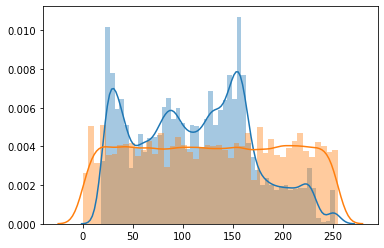

In [13]:
sns.distplot(input_im)
sns.distplot(result_im)

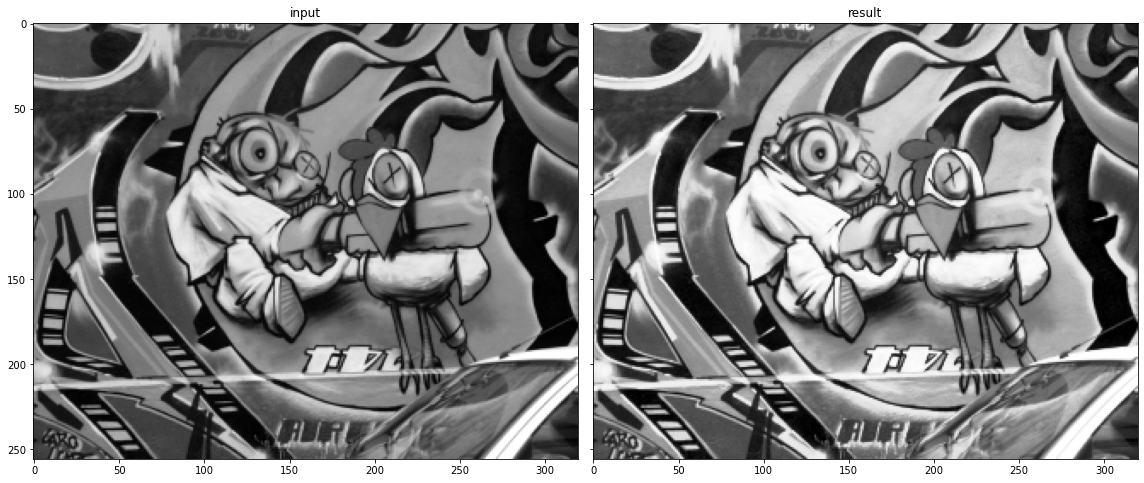

In [14]:
blurred_images = [input_im, result_im]
titles = ["input", "result"]
plot_multiple(blurred_images, titles, max_columns=2, size_scale=8)